# Introduction

This data was collected from [Kaggle](https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv). There was recently a large boom in housing prices in Melbourne, but it has cooled down. Regardless, housing prices are rapidly increasing and do not seem to be stopping soon. It will be interesting to analyze and make predictions off of this dataset.

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("MelbourneHousing.csv")
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
housing.shape

(34857, 21)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
unique_values = {}
for i in housing.columns:
    unique_values[i] = housing[i].nunique()

pd.Series(unique_values, name = 'Number of Unique Values')

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
Name: Number of Unique Values, dtype: int64

# Data Cleaning

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Before we start cleaning data, we can first convert several object features into categorical features and date features. In particular, Postcode is being recognized as a float when it should not be.

In [7]:
cat_col = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
for col in cat_col:
    housing[col] = housing[col].astype('category')
housing['Postcode'] = housing['Postcode'].astype('object')
housing['Date'] = pd.to_datetime(housing['Date'])

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  object        
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

We can now take a look at how much missing data there is.

<AxesSubplot:>

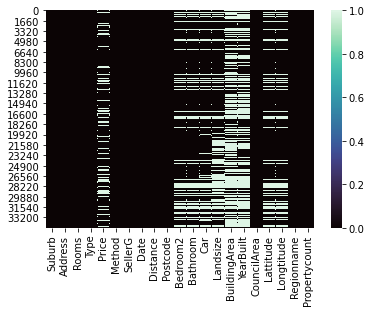

In [9]:
sns.heatmap(housing.isnull(), cmap = "mako")

In [10]:
percent_missing = housing.isna().sum() / len(housing) * 100
total_missing = housing.isna().sum()
pd.DataFrame({'# Missing': total_missing, '% Missing': percent_missing})

,# Missing,% Missing
Suburb,0,0.000000
Address,0,0.000000
Rooms,0,0.000000
Type,0,0.000000
Price,7610,21.832057
Method,0,0.000000
SellerG,0,0.000000
Date,0,0.000000
Distance,1,0.002869
Postcode,1,0.002869


So it's clear that there is a lot of missing data. Furthermore, from this visualization, it appears that data that is missing in one feature may be missing in others.
* Price, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Latitude and Longitude are the features that contain missing data

There are several ways to deal with the missing data. It can simply be dropped, for simplicity; however, this is not optimal. There could be valuable trends that are being dropped and it also may not be clear whether that row is missing completely at random, missing at random or missing not at random. 

Another way to deal with this is using multiple imputation by chained equations or MICE. This type of imputation has improved performance over single imputation, but is computationally expensive. It is a multivariate imputation method so it uses other features within the data itself to predict and impute missing values. 

For now, all the missing data will simply be dropped.

In [11]:
housing = housing.dropna()
housing.shape

(8887, 21)

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         8887 non-null   category      
 1   Address        8887 non-null   object        
 2   Rooms          8887 non-null   int64         
 3   Type           8887 non-null   category      
 4   Price          8887 non-null   float64       
 5   Method         8887 non-null   category      
 6   SellerG        8887 non-null   category      
 7   Date           8887 non-null   datetime64[ns]
 8   Distance       8887 non-null   float64       
 9   Postcode       8887 non-null   object        
 10  Bedroom2       8887 non-null   float64       
 11  Bathroom       8887 non-null   float64       
 12  Car            8887 non-null   float64       
 13  Landsize       8887 non-null   float64       
 14  BuildingArea   8887 non-null   float64       
 15  YearBuilt      8887 

In [13]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

In [14]:
# # definitely can impute price as well. can also impute including price variable. but when does it make sense to do so?
# imp = IterativeImputer(random_state = 0) # can modify imputation settings
# numerics = ['int64', 'float64']
# numeric_housing = housing.select_dtypes(include=numerics).drop('Price', 1)
# # NOTE: can only impute floats and integers i guess? we can look into stratified sampling and mode to impute the others
# imp.fit_transform(numeric_housing)

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
4,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
6,4,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
11,3,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
14,2,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...
34847,3,25.5,3.0,2.0,2.0,383.0,118.0,2016.0,-37.61940,145.03951,2940.0
34849,3,25.5,3.0,2.0,2.0,404.0,158.0,2012.0,-37.61031,145.03393,2940.0
34853,2,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0
34854,2,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856,6543.0


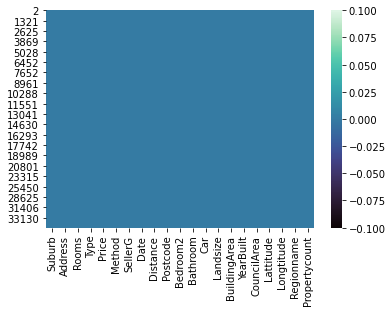

In [15]:
sns.heatmap(housing.isnull(), cmap = "mako")
y = housing['Price']
X = housing.select_dtypes(include = ['int64', 'float64']) # in the future, categorical variables can be included
X.drop('Price', axis = 1)

# EDA

First, we can take a look at the qualities of our target feature: Price.

<AxesSubplot:xlabel='Price', ylabel='Count'>

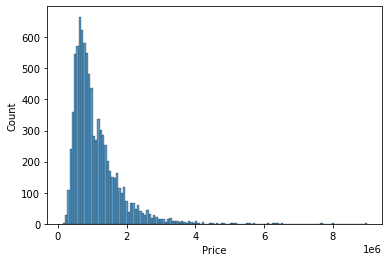

In [16]:
sns.histplot(housing['Price'])

Clearly, the Price distribution is skewed right and appears to be Gaussian. This can be verified using a log transformation. 

<AxesSubplot:xlabel='Price', ylabel='Count'>

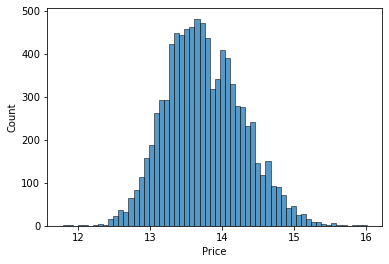

In [17]:
sns.histplot(np.log(housing['Price']))

To gather additional insights, the pricing distribution may be different in different regions.

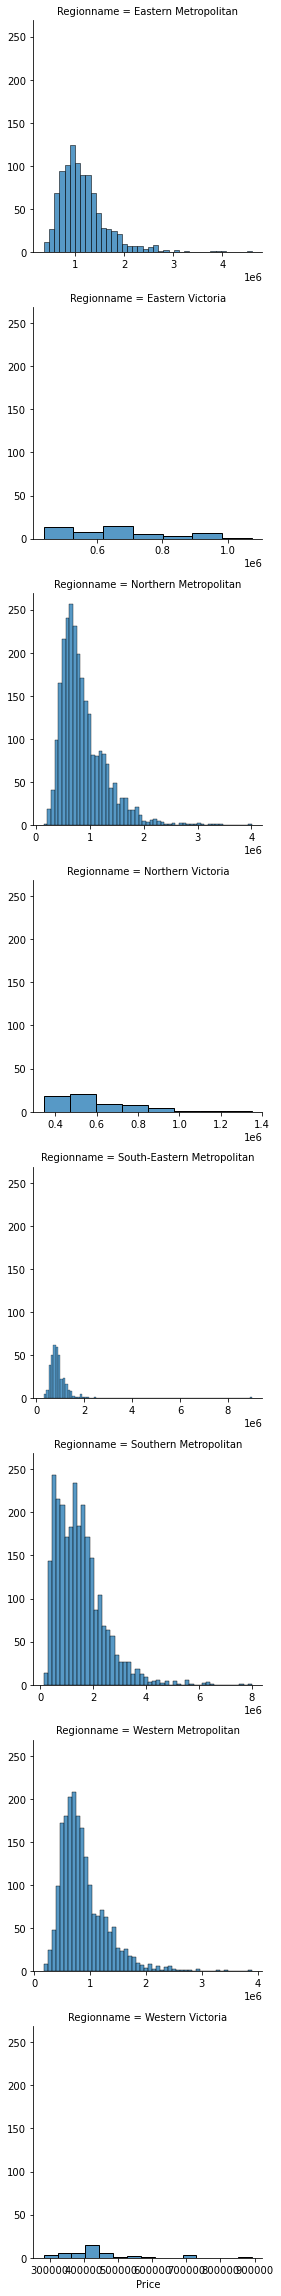

In [28]:
g = sns.FacetGrid(housing, row = 'Regionname', height = 4, sharex = False)
g.map(sns.histplot, "Price") 

# Data Preprocessing(maybe)

# Model Building

In [19]:
from sklearn.model_selection import train_test_split
# currently only numerical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

The following models will be used: XGBoost, KNN, SVM, Linear Regression and Random Forest.

In [20]:
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression # ridge + lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [21]:
xg = XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.9997124004747053

In [22]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.9997338934769064

In [23]:
# lm =

In [24]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.09106186031174501

In [25]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9986071800517036

The standard K-Fold Cross Validation for K = 5 will be used to evaluate these models. 

In [26]:
cross_val_score(XGBRegressor(), X, y)

NameError: name 'cross_val_score' is not defined

In [ ]:
cross_val_score(KNeighborsRegressor(), X, y)

In [ ]:
cross_val_score(SVR(), X, y)

In [ ]:
cross_val_score(RandomForestRegressor(), X, y)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Findings

# Future

This initial model can be improved in a variety of ways:
* Use PCA to find out which variables are the most important
* One-hot encoding to split categorical variables 
* Hyperparameter tuning
* Different method of imputation 
    * MICE can still be used, but less data can be dropped
    * More care can be used when looking at which data to drop and impute and the MICE strategy
    * Potentially pass in just highly correlated data or important features using PCA
* Handle text and date features differently
Modularize code using functions and loops